In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
results_path = 'Results_LP+DAW_347.xlsx'
results_df = pd.read_excel(results_path, dtype = str)

In [3]:
results_df = results_df.rename(columns={
    'Hora de inicio': 'start_date',
    'Hora de finalización': 'end_date',
    'Selecciona la asignatura':'subject',
    'Selecciona la pregunta': 'question',
    'Conversación con ChatGPT': 'conversation_ChatGPT',
    '¿Cuántas preguntas has realizado a ChatGPT para obtener la mejor respuesta?': 'numTries_ChatGPT',
    'Conversación con Gemini': 'conversation_Gemini',
    '¿Cuántas preguntas has realizado a Gemini para obtener la mejor respuesta?': 'numTries_Gemini',
    'Conversación con Copilot': 'conversation_Copilot',
    '¿Cuántas preguntas has realizado a Copilot para obtener la mejor respuesta?': 'numTries_Copilot',
    '¿Te ha ayudado ChatGPT a responder a la pregunta?': 'rating_ChatGPT',
    '¿Te ha ayudado Gemini a responder a la pregunta?': 'rating_Gemini',
    '¿Te ha ayudado Copilot a responder a la pregunta?': 'rating_Copilot',
    'Indica tu respuesta a la pregunta':'final_answer'
}).drop(columns=results_df.columns, errors='ignore')

In [4]:
results_df = results_df[results_df['subject']=="Desarrollo de Aplicaciones Web"]

In [5]:
results_df['numTries_ChatGPT'] = results_df['numTries_ChatGPT'].astype(int)
results_df['numTries_Gemini'] = results_df['numTries_Gemini'].astype(int)
results_df['numTries_Copilot'] = results_df['numTries_Copilot'].astype(int)

In [6]:
response_map = {
 'Si. Me ha dado la mejor respuesta' : 'Mejor respuesta',
 'Si. Me ha dado una respuesta correcta, pero menos completa que otras IAs': 'Correcta, pero no tan completa',
 'No. Me ha contestado correctamente, pero no responde a la pregunta que le he hecho': 'No responde a la pregunta',
 'No. Me ha contestado de forma errónea': 'Responde incorrectamente'
}
results_df['rating_ChatGPT_reduced'] = results_df['rating_ChatGPT'].apply(lambda rating: response_map[rating])
results_df['rating_Gemini_reduced'] = results_df['rating_Gemini'].apply(lambda rating: response_map[rating])
results_df['rating_Copilot_reduced'] = results_df['rating_Copilot'].apply(lambda rating: response_map[rating])

In [7]:
results_df.head()

,start_date,end_date,subject,question,conversation_ChatGPT,numTries_ChatGPT,conversation_Gemini,numTries_Gemini,conversation_Copilot,numTries_Copilot,rating_ChatGPT,rating_Copilot,rating_Gemini,rating_ChatGPT_reduced,rating_Gemini_reduced,rating_Copilot_reduced
147,2024-04-16 09:11:39,2024-04-16 09:15:50,Desarrollo de Aplicaciones Web,Pregunta 1,¿Qué relación existe entre JPA y Spring Data?,1,¿Qué relación existe entre JPA y Spring Data?,1,.,0,"Si. Me ha dado una respuesta correcta, pero me...","Si. Me ha dado una respuesta correcta, pero me...","Si. Me ha dado una respuesta correcta, pero me...","Correcta, pero no tan completa","Correcta, pero no tan completa","Correcta, pero no tan completa"
148,2024-04-16 09:12:42,2024-04-16 09:16:08,Desarrollo de Aplicaciones Web,Pregunta 1,¿Qué relación existe entre JPA y Spring Data?,1,¿Qué relación existe entre JPA y Spring Data?,1,¿Qué relación existe entre JPA y Spring Data?,1,Si. Me ha dado la mejor respuesta,"Si. Me ha dado una respuesta correcta, pero me...","Si. Me ha dado una respuesta correcta, pero me...",Mejor respuesta,"Correcta, pero no tan completa","Correcta, pero no tan completa"
149,2024-04-16 09:16:45,2024-04-16 09:17:22,Desarrollo de Aplicaciones Web,Pregunta 2,Si tenemos dos entidades relacionadas bidirecc...,1,Si tenemos dos entidades relacionadas bidirecc...,1,Si tenemos dos entidades relacionadas bidirecc...,1,Si. Me ha dado la mejor respuesta,"Si. Me ha dado una respuesta correcta, pero me...","Si. Me ha dado una respuesta correcta, pero me...",Mejor respuesta,"Correcta, pero no tan completa","Correcta, pero no tan completa"
150,2024-04-16 09:15:52,2024-04-16 09:18:16,Desarrollo de Aplicaciones Web,Pregunta 2,Si tenemos dos entidades relacionadas bidirecc...,1,Si tenemos dos entidades relacionadas bidirecc...,2,.,0,Si. Me ha dado la mejor respuesta,"Si. Me ha dado una respuesta correcta, pero me...","No. Me ha contestado correctamente, pero no re...",Mejor respuesta,No responde a la pregunta,"Correcta, pero no tan completa"
151,2024-04-16 09:17:24,2024-04-16 09:19:04,Desarrollo de Aplicaciones Web,Pregunta 3,Dado el siguiente controlador de Spring Boot q...,1,Dado el siguiente controlador de Spring Boot q...,1,Dado el siguiente controlador de Spring Boot q...,1,Si. Me ha dado la mejor respuesta,"Si. Me ha dado una respuesta correcta, pero me...","Si. Me ha dado una respuesta correcta, pero me...",Mejor respuesta,"Correcta, pero no tan completa","Correcta, pero no tan completa"


In [8]:
def numTries_perQuestion(question):
    df = results_df
    if question != 'All':
        df = results_df[results_df['question']==question]
    results = [
        question,
        df['numTries_ChatGPT'].mean(),
        df[df['numTries_Gemini']>0]['numTries_Gemini'].mean(),
        #df['numTries_Gemini'].mean(),
        df['numTries_Copilot'].mean()
    ]
    return results

# Número de preguntas hechas a cada IA (media)

Comentarios:
- Hay 12 alumnos que en Gemini tienen un 0 porque tuvieron problemas con su cuenta de Google

Observaciones preliminares:
- En general, la media de nº de preguntas para todas las IAs es de ~1.13 intentos de pregunta

In [9]:
len(results_df[results_df['numTries_Gemini']==0])

12

In [10]:
rows = [numTries_perQuestion("All")] + [numTries_perQuestion("Pregunta "+str(i)) for i in range(1,7)]
pd.DataFrame(rows,columns=['Question','ChatGPT','Gemini','Copilot']).round(decimals=3)

,Question,ChatGPT,Gemini,Copilot
0,All,1.138,1.131,1.144
1,Pregunta 1,1.156,1.140,1.244
2,Pregunta 2,1.237,1.222,1.132
3,Pregunta 3,1.125,1.067,1.062
4,Pregunta 4,1.031,1.033,1.031
5,Pregunta 5,1.000,1.042,1.077
6,Pregunta 6,1.273,1.300,1.318


In [11]:
colors = {
    'Mejor respuesta':  'gold',
    'Correcta, pero no tan completa': 'silver', 
    'No responde a la pregunta': 'salmon', 
    'Responde incorrectamente': 'orangered'
}

def ia_rating_pieChart(ia, question, ax):
    df = results_df[results_df['question']==question].groupby(['rating_'+ia+'_reduced']).count()
    df.plot.pie(
        y='question', ylabel='', autopct='%1.1f%%', #labeldistance=None,
        title="¿Te ha ayudado %s a responder a la %s?"%(ia, question),
        ax=ax, legend=False, colors=[colors[name] for name in df.index]
    )
    #.legend(bbox_to_anchor=(1,1), loc="lower right", bbox_transform=plt.gcf().transFigure)

# Cuánto ha ayudado cada IA en cada pregunta

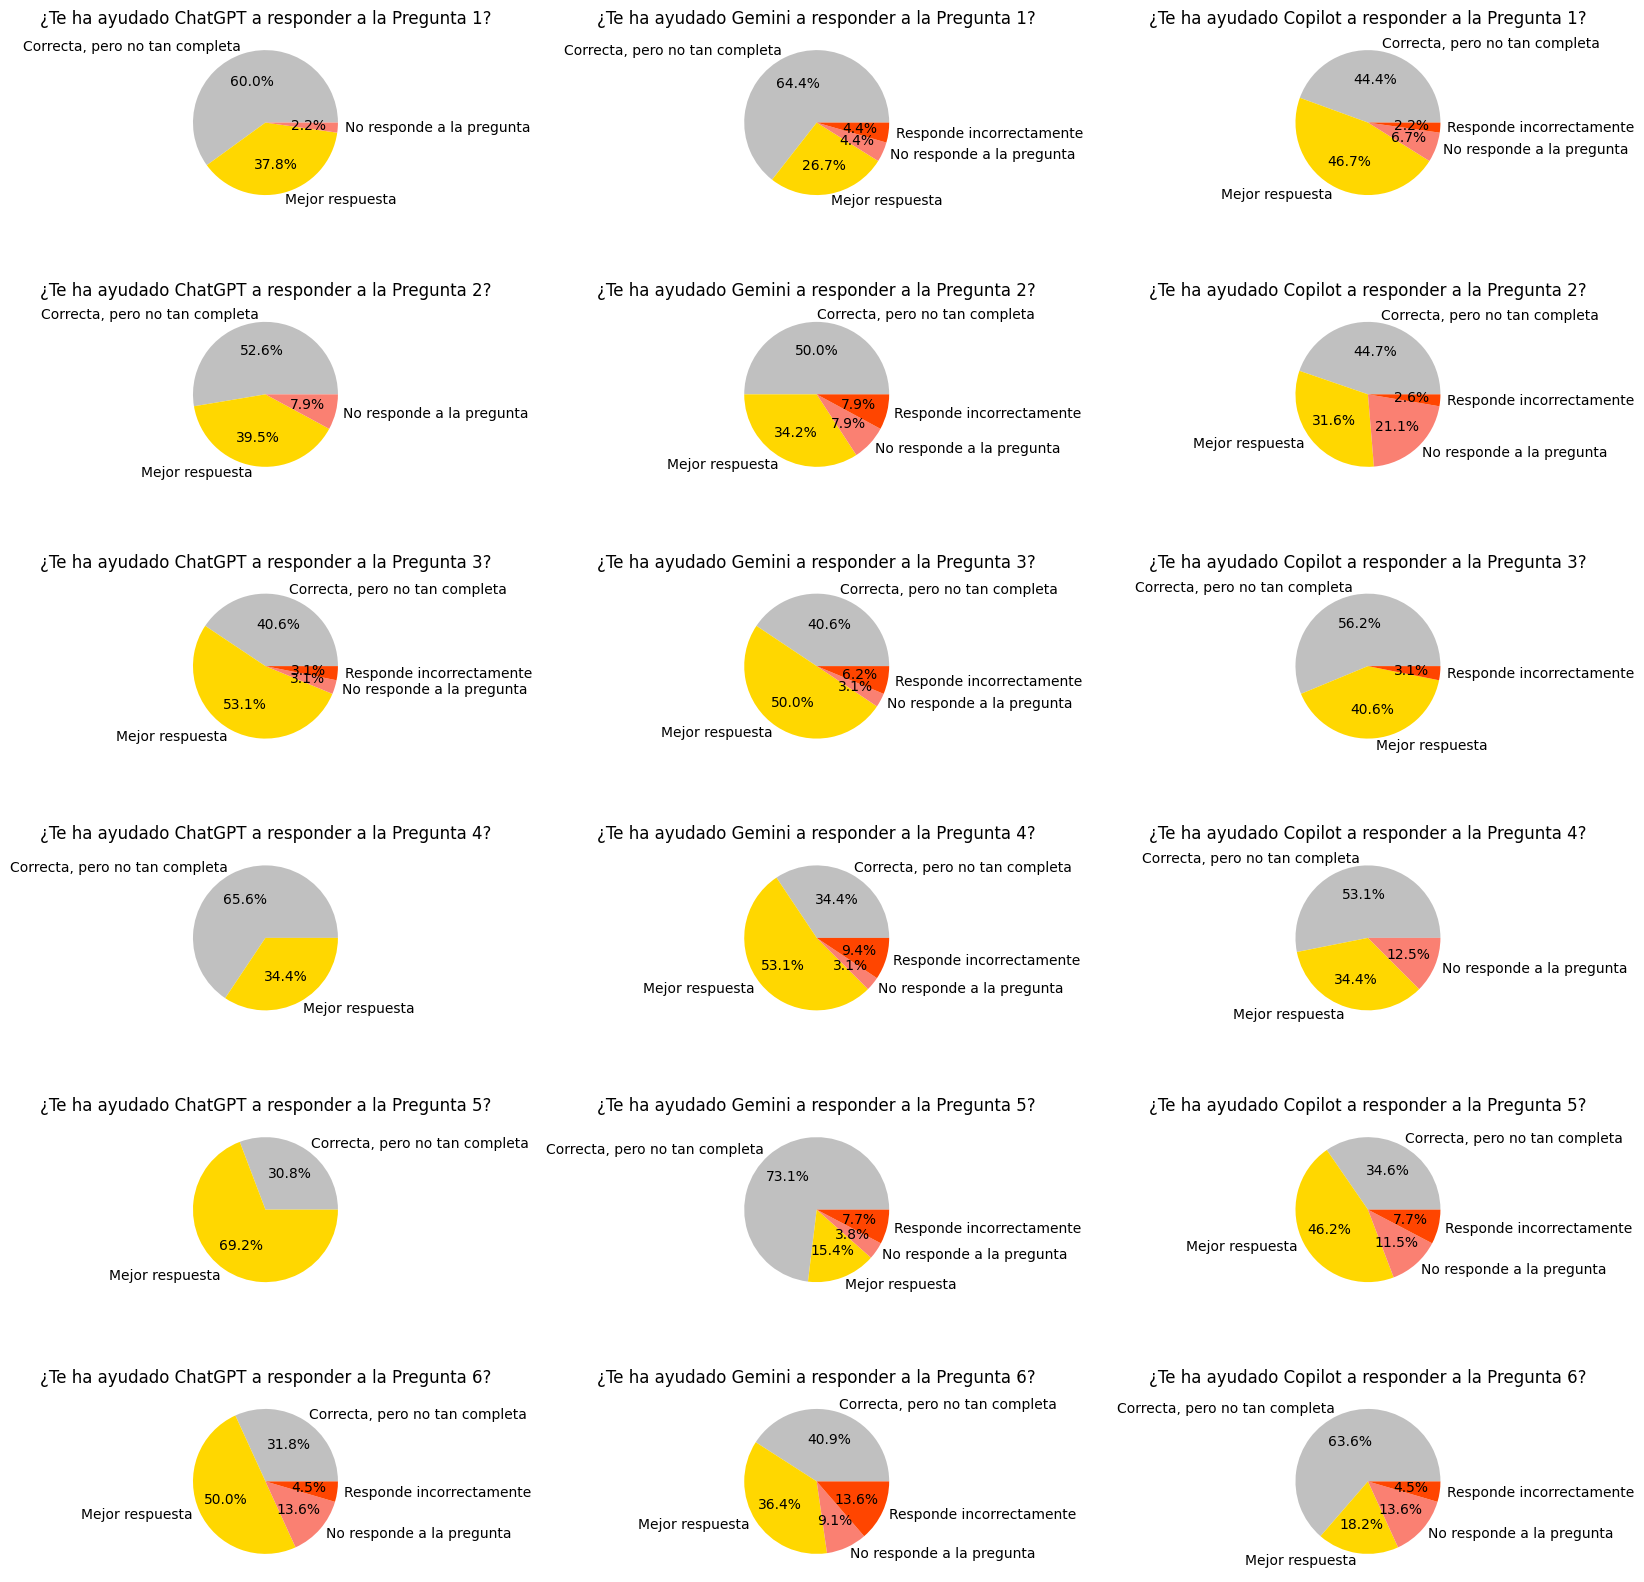

In [12]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(21,20))
fig.subplots_adjust(hspace=0.5, wspace=0.05)

row,col = 0,0
for question in range(1,7):
    for ia in ['ChatGPT','Gemini','Copilot']:
        ia_rating_pieChart(ia, 'Pregunta '+str(question), axes[row,col])
        if col == 2:
            col = 0
            row = row + 1
        else:
            col+=1